In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import json
import sys
sys.path.append('/Users/glover.co/Documents/laszlo/NetDesign/scripts/')
import assembly_tree as at
import graph_tool.all as gt
from matplotlib.colors import to_rgba
from tqdm import tqdm

In [2]:
# Find biggish protein
with open('../data/properties.json', 'r') as f:
    properties = json.load(f)

In [3]:
big_proteins = []
for prot_type in ['human','mouse','yeast']:
    subprot = properties['proteins'][prot_type]
    for s in subprot:
        if subprot[s]['N'] > 10:
            big_proteins.append(s)

In [4]:
def O_respecting_rewiring(g,T):
    types = nx.get_node_attributes(g,"label")
    unique_types = np.unique(list(types.values()))
    k = unique_types.size

    class_to_vs = {type : [] for type in unique_types}
    for v in g:
        class_to_vs[types[v]].append(v)
    
    for i in range(T):
        t1,t2 = np.random.choice(unique_types,2)
        if t1 == t2 and len(class_to_vs[t1])>3:
            u1,u2,v1,v2 = np.random.choice(class_to_vs[t1],4,replace=False)
        elif t1 != t2 and len(class_to_vs[t1])>1 and len(class_to_vs[t2])>1:
            u1,u2 = np.random.choice(class_to_vs[t1],2,replace=False)
            v1,v2 = np.random.choice(class_to_vs[t2],2,replace=False)
        else:
            continue
        if g.has_edge(u1,v1) and g.has_edge(u2,v2) and not g.has_edge(u1,v2) and not g.has_edge(u2,v1):
            g.remove_edge(u1,v1)
            g.remove_edge(u2,v2)
            g.add_edge(u1,v2)
            g.add_edge(u2,v1)
    return g

In [5]:
# Read in example protein
protein = nx.read_edgelist('../data/protein_complex/proteins/human/edgefiles/CPX-1919.edge',nodetype=int)
X = np.loadtxt('../data/protein_complex/proteins/human/Xfiles/X_CPX-1919.txt')

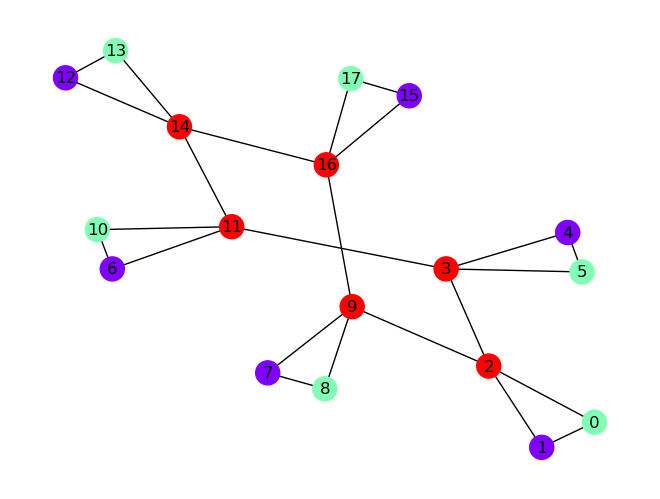

In [6]:
at.draw_network(protein,X,with_labels=True)

In [7]:
X
O = np.array([[0,1,1],[1,0,1],[1,1,2]])

In [8]:
p, samples,idx = at.prob_dist(X,O,O.sum(axis=1),max_iters=10000,verbose=True)

100%|██████████| 5620/5620 [02:42<00:00, 34.52it/s]


In [15]:
for i, g in enumerate(samples):
    if nx.is_isomorphic(protein,g):
        prot_idx = i
        break

In [18]:
p[prot_idx]

0.0014234875444839859

In [10]:
p_nd = {}
samples_nd = {}
p_nd[10000] = p
samples_nd[10000] = samples

In [11]:
at.entropy(p)

4.241582536447761

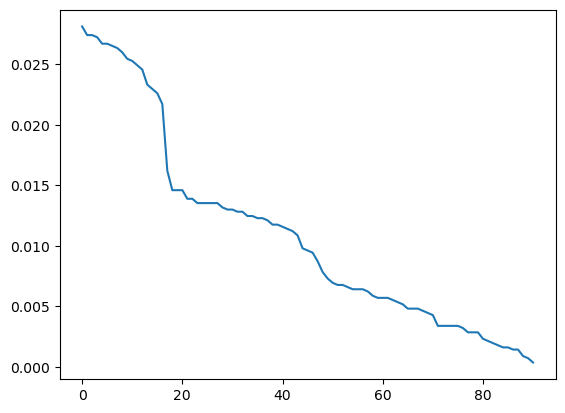

In [14]:
plt.plot(np.sort(p)[::-1])

In [7]:
small_X = np.array([[1],[1],[1]])
small_O = np.array([[2]])
small_p, small_samples,small_idx = at.prob_dist(small_X,small_O,small_O.sum(axis=1),multiedge=True,max_iters=10000,verbose=True)

100%|██████████| 10000/10000 [00:00<00:00, 15994.86it/s]


In [12]:
# g, rates = at.microcanonical_ensemble(small_X,small_O,small_O.sum(axis=1),multiedge=True,ret_rates=True)
# nx.draw(g)    # if nx.is_isomorphic(samples[i],protein):
# print(rates[:]) _  
at.entropy(small_p_cyc)

1.4198468368775536

In [11]:
small_X = np.array([[1],[1],[1],[1],[1],[1]])
small_O = np.array([[2]])
small_p_cyc, small_samples_cyc,small_idx_cyc = at.prob_dist(small_X,small_O,small_O.sum(axis=1),multiedge=False,max_iters=10000,verbose=True)

100%|██████████| 10000/10000 [00:01<00:00, 7735.40it/s]


0.003669724770642202


([<matplotlib.lines.Line2D at 0x15ce5f890>], None)

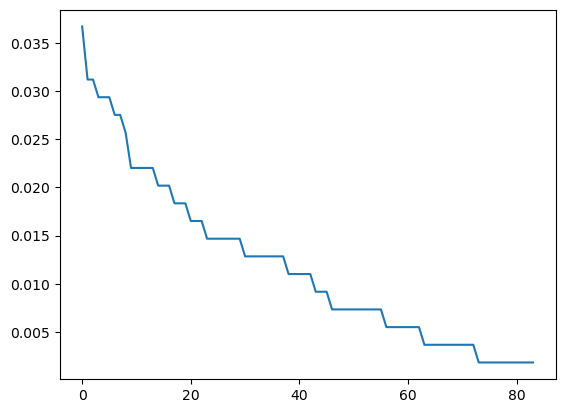

In [14]:
plt.plot(p[idx]), print(p[56])

In [15]:
at.entropy(p)

4.172632301099478

In [26]:
g, ret_rates = at.microcanonical_ensemble(X,O,O.sum(axis=1),T=10000,initial_graph=None,ret_rates=True)

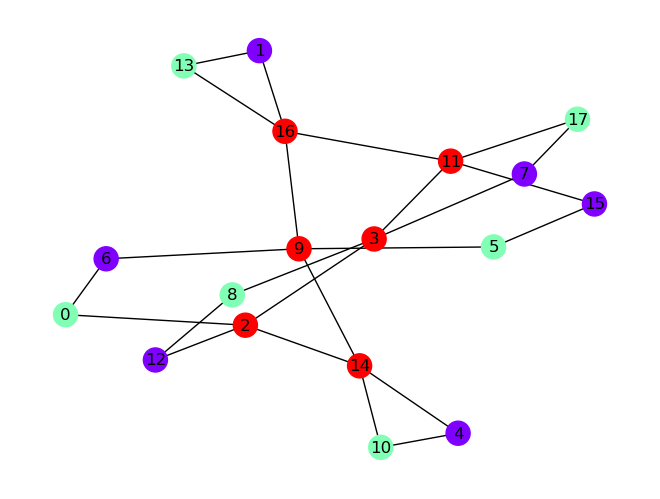

In [27]:
at.draw_network(g,X,with_labels=True)

In [28]:
ret_rates

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

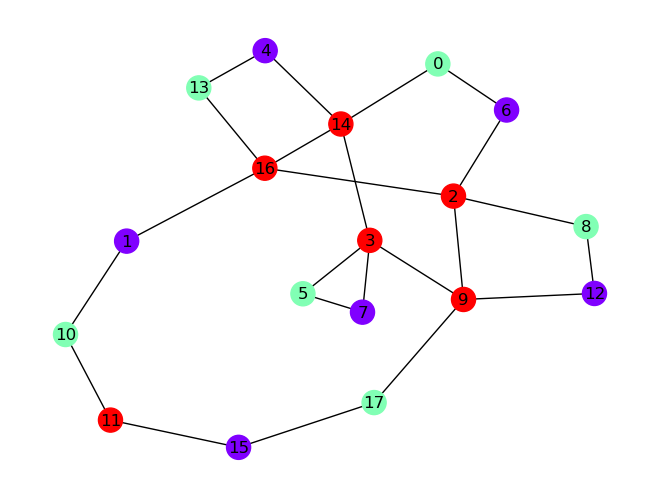

In [18]:
at.draw_network(at.microcanonical_ensemble(X,O,O.sum(axis=1),T=10000),X,with_labels=True)

In [12]:
at.entropy(p)

3.8175961906810056

In [14]:
def canonical_form(G):
    # Fast graph hashing for isomorphism classes
    return nx.weisfeiler_lehman_graph_hash(G)

def count_isomorphs(graphs):
    counts = dict()
    for G in graphs:
        key = canonical_form(G)
        try:
            counts[key] += 1
        except:
            counts[key] = 1
    return counts

In [138]:
# p_gnp = {}
# p_cm = {}
# p_ba = {}
# p_sbm = {}
# samples_gnp = {}
# samples_ba = {}
# samples_cm = {}
# samples_sbm = {}
for iter in [10,100,500,1000,5000,10000]:
    gnp_graphs = []
    gnp_count = []
    cm_graphs = []
    cm_count = []
    ba_graphs = []
    ba_count = []
    sbm_graphs = []
    sbm_count = []
    nd_graphs = []
    N = protein.number_of_nodes()
    L = protein.number_of_edges()
    for _ in range(len(gnp_graphs),iter):
        ba_graphs.append(nx.barabasi_albert_graph(N,1))
        cm_graphs.append(nx.double_edge_swap(protein.copy(),2*protein.number_of_edges()))
        sbm_graphs.append(nx.stochastic_block_model([6,6,6],np.array([[0,1/6,1/6],[1/6,0,1/6],[1/6,1/6,2/5]])))
        gnp_found = False
        gnp_idx = []
        ba_found = False
        ba_idx = []
        cm_found = False
        cm_idx = []
        sbm_found = False
        sbm_idx = []
        g = nx.gnm_random_graph(N,L)
        gnp_found = False
        for k in gnp_idx:
            if nx.is_isomorphic(gnp_graphs[k],g):
                gnp_found = True
                break
        if gnp_found:
            gnp_count[k] += 1
        else:
            gnp_count.append(1)
            gnp_idx = np.argsort(gnp_count)[::-1]
            gnp_graphs.append(g)
        g = nx.barabasi_albert_graph(N,L//2)
        ba_found = False
        for k in ba_idx:
            if nx.is_isomorphic(ba_graphs[k],g):
                ba_found = True
                break
        if ba_found:
            ba_count[k] += 1
        else:
            ba_count.append(1)
            ba_idx = np.argsort(ba_count)[::-1]
            ba_graphs.append(g)
        g = nx.double_edge_swap(protein.copy(),2*protein.number_of_edges())
        cm_found = False
        for k in cm_idx:
            if nx.is_isomorphic(cm_graphs[k],g):
                cm_found = True
                break
        if cm_found:
            cm_count[k] += 1
        else:
            cm_count.append(1)
            cm_idx = np.argsort(cm_count)[::-1]
            cm_graphs.append(g)
        g = nx.stochastic_block_model([6,6,6],np.array([[0,1/6,1/6],[1/6,0,1/6],[1/6,1/6,2/5]]))
        sbm_found = False
        for k in sbm_idx:
            if nx.is_isomorphic(sbm_graphs[k],g):
                sbm_found = True
                break
        if sbm_found:
            sbm_count[k] += 1
        else:
            sbm_count.append(1)
            sbm_idx = np.argsort(sbm_count)[::-1]
            sbm_graphs.append(g)
    p_gnp[iter] = np.array(gnp_count) / iter
    p_cm[iter] = np.array(cm_count) / iter
    p_ba[iter] = np.array(ba_count) / iter
    p_sbm[iter] = np.array(sbm_count) / iter
    samples_gnp[iter] = gnp_graphs
    samples_ba[iter] = ba_graphs
    samples_cm[iter] = cm_graphs
    samples_sbm[iter] = sbm_graphs

In [109]:
int(L/N)

1

In [137]:
# p_nd = {}
# samples_nd = {}

ba_graphs = []
ba_count = []
ba_idx = []
for iter in [10000]:
    for i in tqdm(range(iter)):
        g = nx.barabasi_albert_graph(N,1)
        ba_found = False

        for k in ba_idx:
            if nx.is_isomorphic(ba_graphs[k],g):
                ba_found = True
                break
        if ba_found:
            ba_count[k] += 1
        else:
            ba_count.append(1)
            ba_idx = np.argsort(ba_count)[::-1]
            ba_graphs.append(g)

  9%|▊         | 857/10000 [16:31<2:56:20,  1.16s/it] 


KeyboardInterrupt: 

In [ ]:
at.entropy()

In [155]:
small_X = np.zeros((6,1))
small_X[:,0] = 1
p, samples, idx = at.prob_dist(X,O,O.sum(axis=1),max_iters=100,verbose=True)

100%|██████████| 62/62 [00:01<00:00, 48.03it/s] 


In [156]:
np.argmax(p)

26

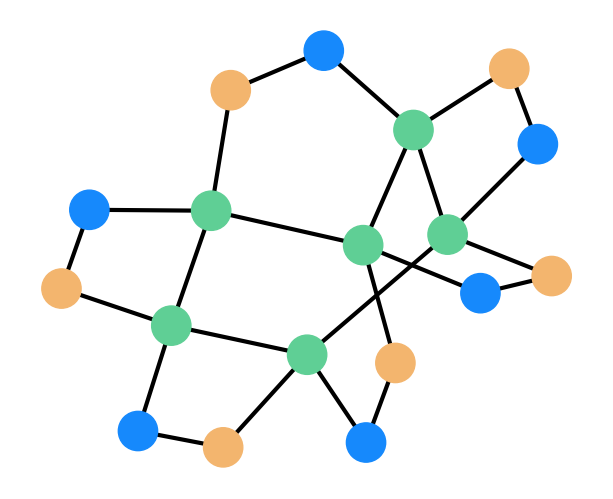

In [165]:
nx.set_edge_attributes(samples[26],3,'weight')
at.draw_network(samples[26],X,with_labels=False,colors=colors,node_size=800)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('figs/nd.png',bbox_inches='tight')


In [29]:
gnp_entropy = np.zeros(6)
cm_entropy = np.zeros(6)
ba_entropy = np.zeros(6)
sbm_entropy = np.zeros(6)
nd_entropy = np.zeros(6)

for idx,i in enumerate([10,100,500,1000,5000,10000]):
    gnp_entropy[idx] = at.entropy(p_gnp[i])
    cm_entropy[idx] = at.entropy(p_cm[i])
    ba_entropy[idx] = at.entropy(p_ba[i])
    sbm_entropy[idx] = at.entropy(p_sbm[i])
    nd_entropy[idx] = at.entropy(p_nd[i])


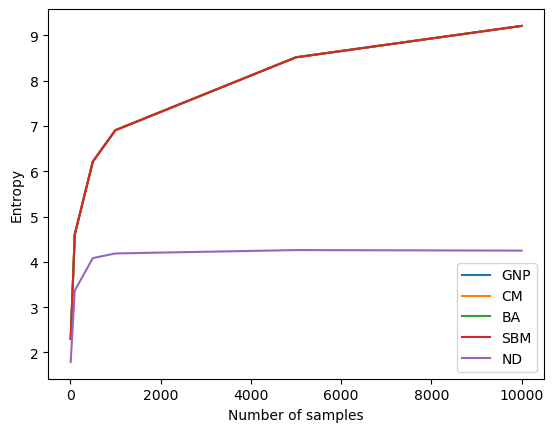

In [32]:
plt.plot([10,100,500,1000,5000,10000],gnp_entropy,label='GNP')
plt.plot([10,100,500,1000,5000,10000],cm_entropy,label='CM')
plt.plot([10,100,500,1000,5000,10000],ba_entropy,label='BA')
plt.plot([10,100,500,1000,5000,10000],sbm_entropy,label='SBM')
plt.plot([10,100,500,1000,5000,10000],nd_entropy,label='ND')
plt.xlabel('Number of samples')
plt.ylabel('Entropy')
plt.legend()
# plt.yscale('log')
# plt.savefig('../figures/entropy.png',dpi=300)
plt.show()

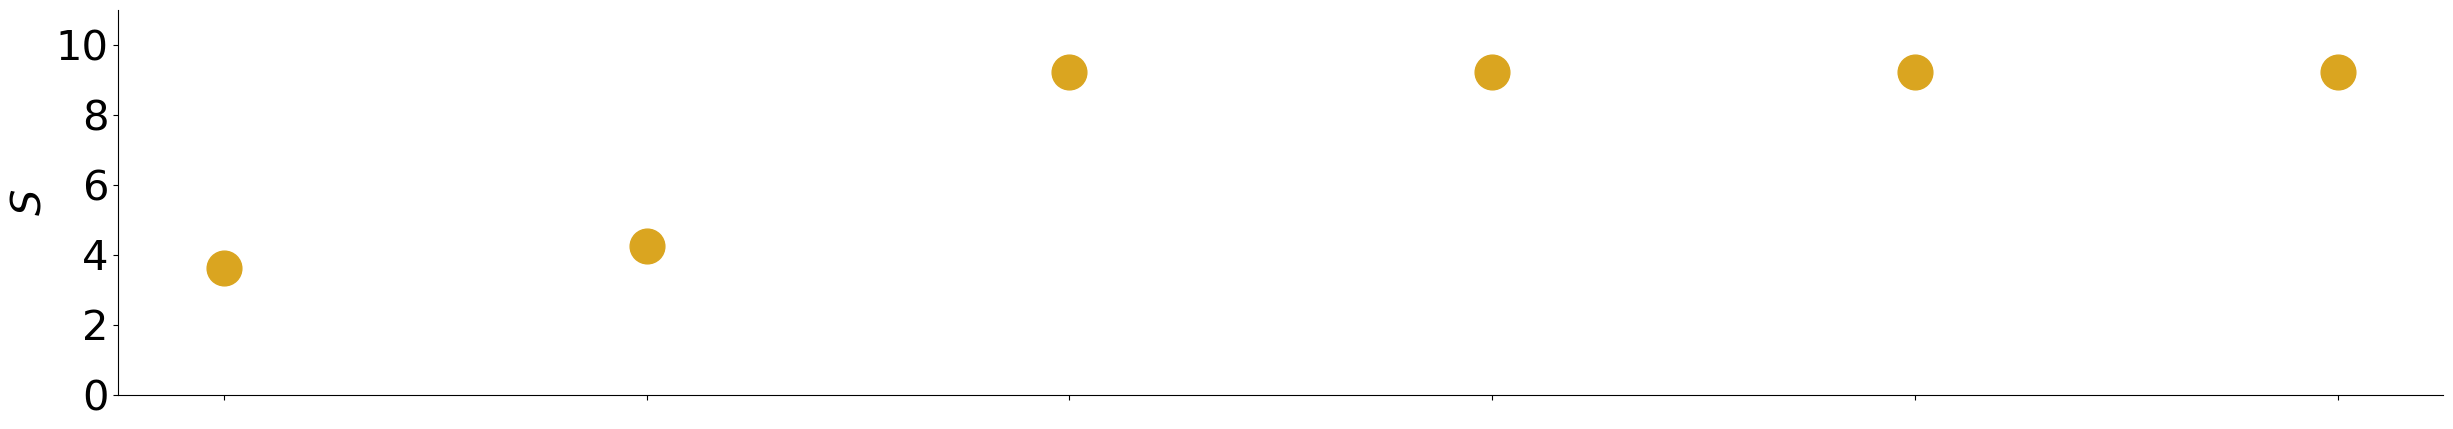

In [166]:
fig,ax = plt.subplots(1,1,figsize=(30,5))
ax.plot([0,1,2,3,4,5],[at.entropy(p),
                          nd_entropy[-1],
                          sbm_entropy[-1],
                          ba_entropy[-1],
                          cm_entropy[-1],
                          gnp_entropy[-1]],'o',markersize=25,color='goldenrod')
ax.set_xticks([0,1,2,3,4,5],['','','','','',''],size=40)
ax.set_ylim(0,11)
ax.set_yticks([0,2,4,6,8,10],[0,2,4,6,8,10],size=30)
ax.set_ylabel('$S$',size=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('figs/entropy_summary.png',dpi=300)

In [28]:
import pickle
# with open('data/gnp_entropy.pickle', 'wb') as f:
#     pickle.dump(gnp_entropy, f)
# with open('data/cm_entropy.pickle', 'wb') as f:
#     pickle.dump(cm_entropy, f)
# with open('data/ba_entropy.pickle', 'wb') as f:
#     pickle.dump(ba_entropy, f)
# with open('data/sbm_entropy.pickle', 'wb') as f:
#     pickle.dump(sbm_entropy, f)
# with open('data/nd_entropy.pickle', 'wb') as f:
#     pickle.dump(nd_entropy, f)
# with open('data/gnp_samples.pickle', 'wb') as f:
#     pickle.dump(samples_gnp, f)
# with open('data/cm_samples.pickle', 'wb') as f:
#     pickle.dump(samples_cm, f)
# with open('data/ba_samples.pickle', 'wb') as f:
#     pickle.dump(samples_ba, f)
# with open('data/sbm_samples.pickle', 'wb') as f:
#     pickle.dump(samples_sbm, f)
with open('data/nd_samples.pickle', 'wb') as f:
    pickle.dump(samples_nd, f)
# with open('data/p_gnp.pickle', 'wb') as f:
#     pickle.dump(p_gnp, f)
# with open('data/p_cm.pickle', 'wb') as f:
#     pickle.dump(p_cm, f)
# with open('data/p_ba.pickle', 'wb') as f:
#     pickle.dump(p_ba, f)
# with open('data/p_sbm.pickle', 'wb') as f:
#     pickle.dump(p_sbm, f)
with open('data/p_nd.pickle', 'wb') as f:
    pickle.dump(p_nd, f)
    

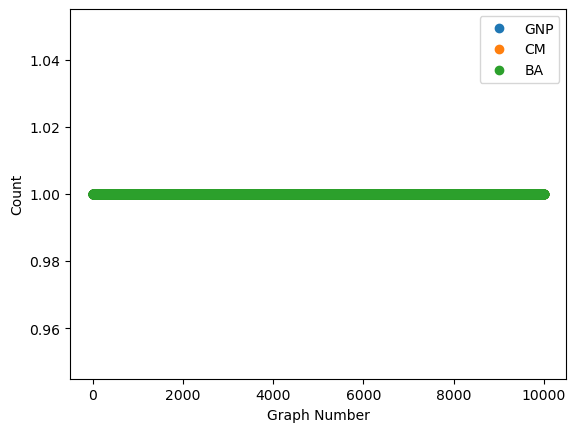

In [81]:
plt.plot(np.arange(len(gnp_count)),gnp_count, 'o',label='GNP')
plt.plot(np.arange(len(cm_count)),cm_count, 'o',label='CM')
plt.plot(np.arange(len(ba_count)),ba_count, 'o',label='BA')
plt.xlabel('Graph Number')
plt.ylabel('Count')
plt.legend()
plt.show()

In [119]:
color_map = [np.array([243,181,110,255])/255,np.array([22,137,252,255])/255,np.array([95,207,149,255])/255]
colors = [color_map[j] for j in X.argmax(axis=1)]

In [120]:
colors

[array([0.08627451, 0.5372549 , 0.98823529, 1.        ]),
 array([0.95294118, 0.70980392, 0.43137255, 1.        ]),
 array([0.37254902, 0.81176471, 0.58431373, 1.        ]),
 array([0.37254902, 0.81176471, 0.58431373, 1.        ]),
 array([0.95294118, 0.70980392, 0.43137255, 1.        ]),
 array([0.08627451, 0.5372549 , 0.98823529, 1.        ]),
 array([0.95294118, 0.70980392, 0.43137255, 1.        ]),
 array([0.95294118, 0.70980392, 0.43137255, 1.        ]),
 array([0.08627451, 0.5372549 , 0.98823529, 1.        ]),
 array([0.37254902, 0.81176471, 0.58431373, 1.        ]),
 array([0.08627451, 0.5372549 , 0.98823529, 1.        ]),
 array([0.37254902, 0.81176471, 0.58431373, 1.        ]),
 array([0.95294118, 0.70980392, 0.43137255, 1.        ]),
 array([0.08627451, 0.5372549 , 0.98823529, 1.        ]),
 array([0.37254902, 0.81176471, 0.58431373, 1.        ]),
 array([0.95294118, 0.70980392, 0.43137255, 1.        ]),
 array([0.37254902, 0.81176471, 0.58431373, 1.        ]),
 array([0.0862

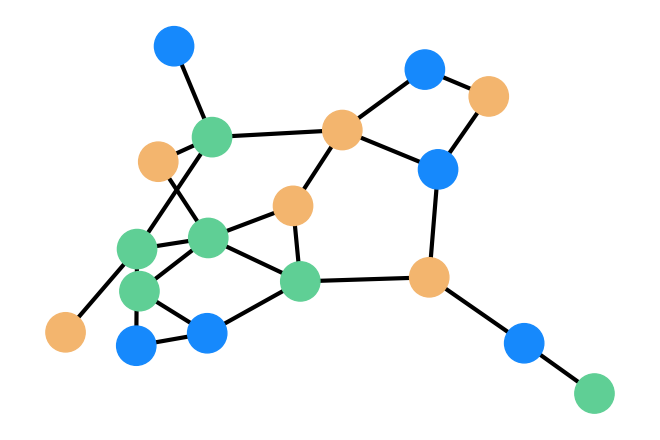

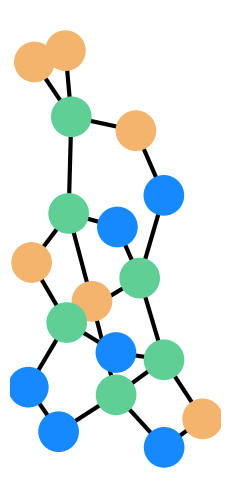

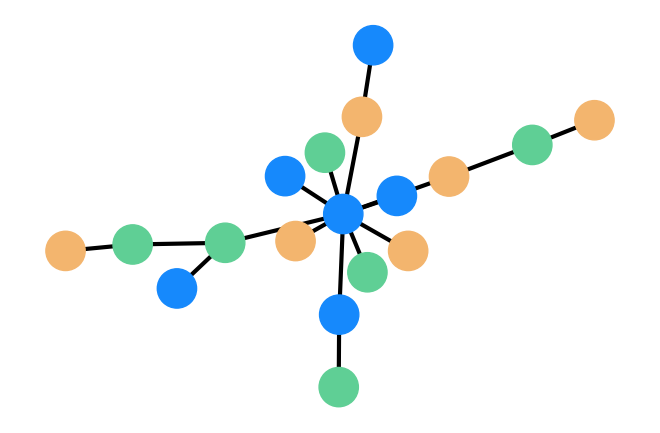

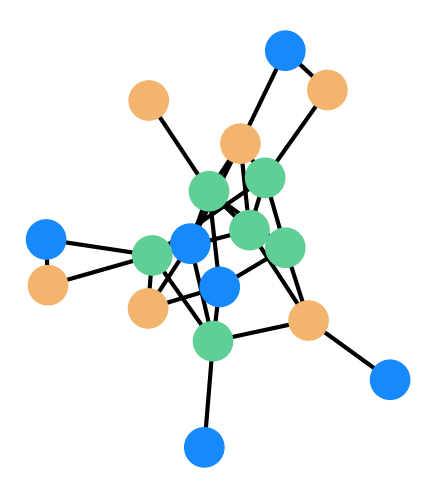

In [177]:
# Give all edges weight 10
for i in range(6,len(samples_gnp[10000])):
    if nx.is_connected(samples_gnp[10000][i]):
        nx.set_edge_attributes(samples_gnp[10000][i],3,'weight')
        at.draw_network(samples_gnp[10000][i],X,colors=colors,node_size=800)
        plt.gca().set_aspect('equal', adjustable='box')
        # plt.tight_layout()
        plt.savefig('figs/gnp.png',dpi=300)
        plt.show()
        break

# Give all edges weight 10
nx.set_edge_attributes(samples_cm[10000][0],3,'weight')
cm_X = np.zeros((18,3))
cm_X[[0,1,5,6,4,10],0] = 1
cm_X[[7,8,12,13,15,17],1] = 1
cm_X[[2,3,9,11,14,16],2] = 1
cm_colors = [color_map[cm_X[j].argmax()] for j in samples_cm[10000][0].nodes()]

# cm_X = cm_X[list(samples_cm[10000][0].nodes())]
at.draw_network(samples_cm[10000][0],cm_X,colors=cm_colors,node_size=800)
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('figs/cm.png',dpi=300)
plt.show()
# Set aspect ratio to a square
nx.set_edge_attributes(samples_ba[10000][0],3,'weight')
at.draw_network(samples_ba[10000][0],X,colors=colors,node_size=800)
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('figs/ba.png',dpi=300)
plt.show()
# Give all edges weight 10
sbm_X = np.zeros((18,3))
sbm_X[:6,0] = 1
sbm_X[6:12,1] = 1
sbm_X[12:,2] = 1
sbm_colors = [color_map[j] for j in sbm_X.argmax(axis=1)]
for i in range(len(samples_sbm[10000])):
    if nx.is_connected(samples_sbm[10000][i]):
        nx.set_edge_attributes(samples_sbm[10000][i],3,'weight')
        at.draw_network(samples_sbm[10000][i],sbm_X,colors=sbm_colors,node_size=800)
        plt.gca().set_aspect('equal', adjustable='box')
        # plt.tight_layout()
        plt.savefig('figs/sbm.png',dpi=300)
        plt.show()
        break

In [169]:
samples_sbm[10000][0].nodes(data=True)

NodeDataView({0: {'block': 0}, 1: {'block': 0}, 2: {'block': 0}, 3: {'block': 0}, 4: {'block': 0}, 5: {'block': 0}, 6: {'block': 1}, 7: {'block': 1}, 8: {'block': 1}, 9: {'block': 1}, 10: {'block': 1}, 11: {'block': 1}, 12: {'block': 2}, 13: {'block': 2}, 14: {'block': 2}, 15: {'block': 2}, 16: {'block': 2}, 17: {'block': 2}})

In [171]:
samples_cm[10000][0].degree()

DegreeView({0: 2, 1: 2, 2: 4, 3: 4, 9: 4, 5: 2, 4: 2, 11: 4, 6: 2, 10: 2, 7: 2, 8: 2, 16: 4, 14: 4, 12: 2, 13: 2, 15: 2, 17: 2})

In [148]:
cm_X = np.zeros((18,3))
cm_X[[0,1,5,6,8,9],0] = 1
cm_X[[10,11,14,15,16,17],1] = 1
cm_X[[2,3,4,7,12,13],2] = 1

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [21]:
len(gnp_graphs), len(cm_graphs), len(ba_graphs)

(9779, 9804, 6)

CM Degree Dist:  [2 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 2]


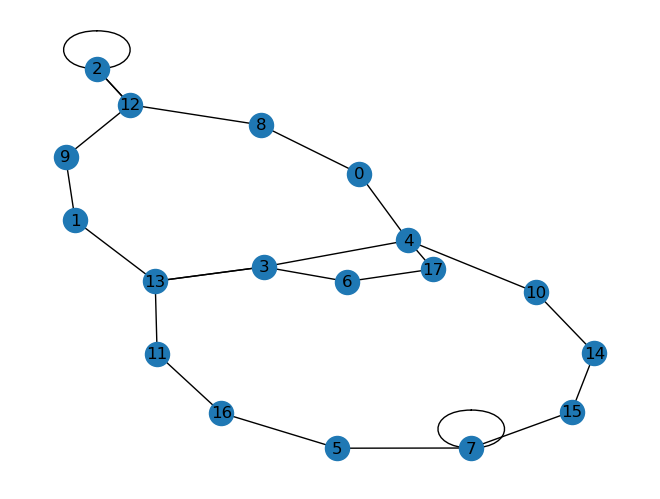

CM Degree Dist:  [2 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 2]


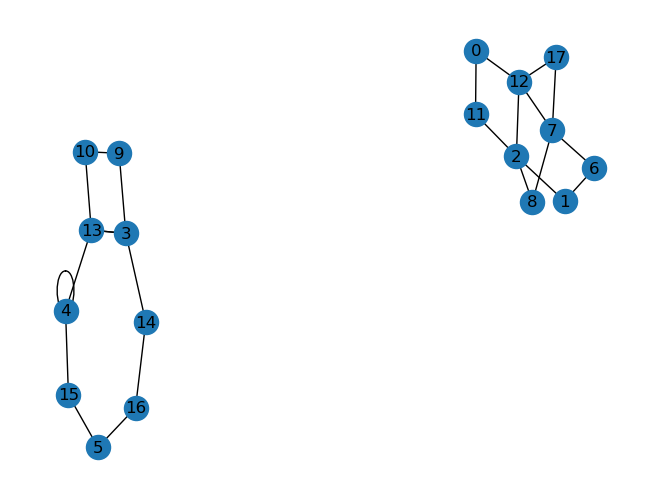

CM Degree Dist:  [2 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 2]


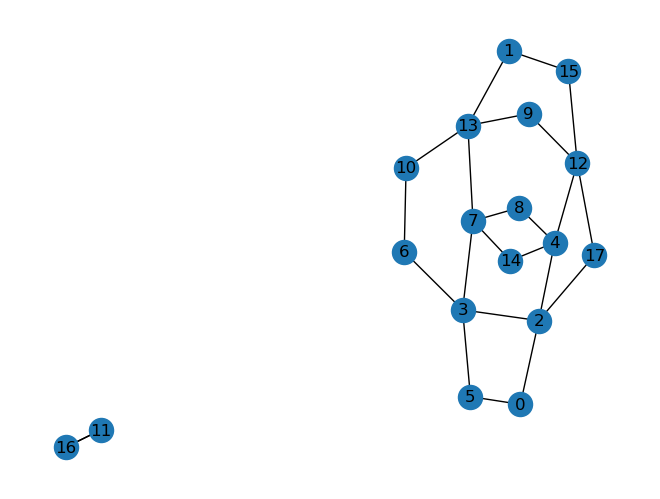

CM Degree Dist:  [2 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 2]


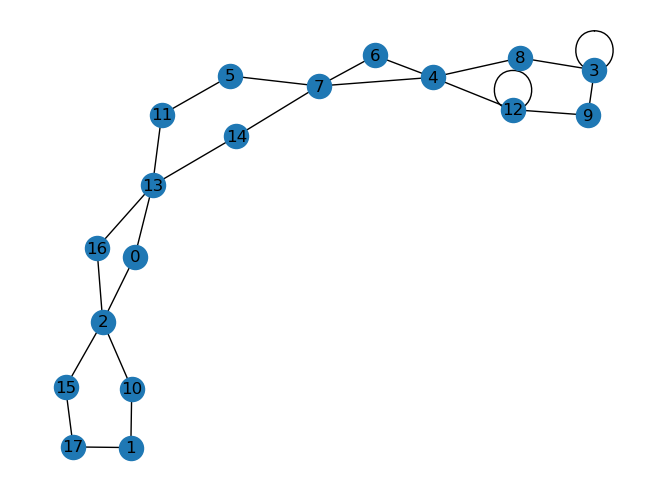

CM Degree Dist:  [2 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 2]


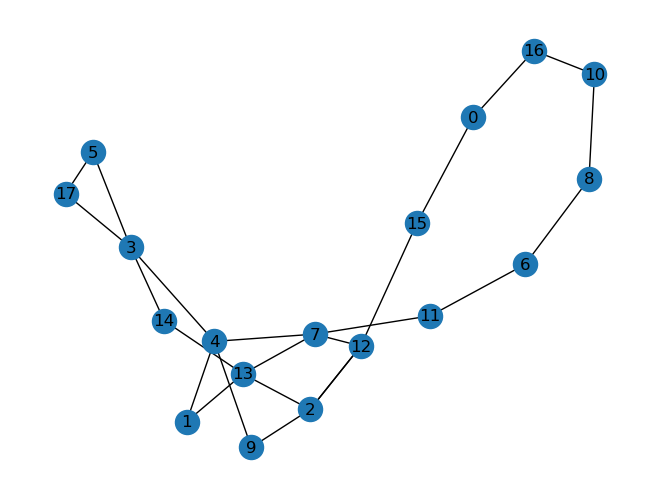

In [26]:
for i in range(5):
    print('CM Degree Dist: ',np.array(cm_graphs[i].degree())[:,1])
    nx.draw(cm_graphs[i], with_labels=True)
    plt.show()

In [27]:
np.log(100)

4.605170185988092

In [33]:
protein.number_of_edges() * 2 / 18

2.6666666666666665

In [ ]:
gt.generate_sbm(X.sum(axis=0),np.array([[0,6,6],[6,0,6],[6,6,6]]),micro_ers=True)

: 